Comparing different optimizers in Machine Learning
---

### Aim: 
Write a program to demonstrate the change in accuracy/loss/convergence time with change
in optimizers like stochastic gradient descent, adam, adagrad, RMSprop and Nadam for
any suitable application

### Objectives:
1. To learn optimization algorithms
2. To learn and understand hyperparameters
 

### Dataset:  

**Malaria Cell Images Dataset**  
The dataset contains 2 folders  
- Infected  
- Uninfected  
And a total of 27,558 images.  
Acknowledgements  
The Malaria dataset contains a total of 27,558 cell images with equal instances of parasitized and uninfected cells from the thin blood smear slide images of segmented cells.  


### Implementation/Program/Code: 

In [1]:
import os
import random
import numpy as np
import pandas as pd
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow.compat.v2 as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten,Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img

In [2]:
Image_Width = 128
Image_Height = 128
Image_Size = (Image_Width,Image_Height)
Image_Channels = 3
batch_size = 32
epochs = 3

In [3]:
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory("C:\\Users\\jeeva\\Downloads\\cell_images",
                                                 target_size=Image_Size,
                                                 class_mode='categorical',
                                                 batch_size=batch_size,
                                                 subset='training')

validation_generator = datagen.flow_from_directory("C:\\Users\\jeeva\\Downloads\\cell_images", 
                                                        target_size=Image_Size,
                                                        class_mode='categorical',
                                                        batch_size=batch_size,
                                                        subset='validation')

Found 22048 images belonging to 2 classes.
Found 5510 images belonging to 2 classes.


### Defining Model

In [4]:
def model():
    model=Sequential()

    model.add(Conv2D(32,(3,3),activation='relu',input_shape=(Image_Width,Image_Height,Image_Channels)))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(64,(3,3),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Dropout(0.3))

    model.add(Flatten())

    model.add(Dense(64,activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(2,activation='softmax'))

    return model

### Training Model for different optimizers

In [5]:
model_adam = model()
model_adam.summary()
adam = keras.optimizers.Adam()
model_adam.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
history_adam = model_adam.fit(train_generator, epochs=epochs, validation_data = validation_generator)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 30, 30, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 57600)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [6]:
model_rms = model()
model_rms.summary()
rmsprop = keras.optimizers.RMSprop()
model_rms.compile(loss='categorical_crossentropy', optimizer=rmsprop, metrics=['accuracy'])
history_rms = model_adam.fit(train_generator, epochs=epochs, validation_data = validation_generator)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 30, 30, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 57600)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

In [7]:
model_adagrad = model()
model_adagrad.summary()
adagrad = keras.optimizers.Adagrad()
model_adagrad.compile(loss='categorical_crossentropy', optimizer=adagrad, metrics=['accuracy'])
history_adagrad= model_adagrad.fit(train_generator, epochs=epochs, validation_data = validation_generator)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 30, 30, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 57600)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

In [8]:
model_nadam = model()
model_nadam.summary()
nadam = keras.optimizers.Nadam()
model_nadam.compile(loss='categorical_crossentropy', optimizer=nadam, metrics=['accuracy'])
history_nadam = model_nadam.fit(train_generator, epochs=epochs, validation_data = validation_generator)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 30, 30, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 57600)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)               

In [9]:
model_sgd = model()
model_sgd.summary()
sgd = keras.optimizers.SGD()
model_sgd.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
history_sgd = model_sgd.fit(train_generator, epochs=epochs, validation_data = validation_generator)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 30, 30, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 57600)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)               

### Comparing Training Accuracies

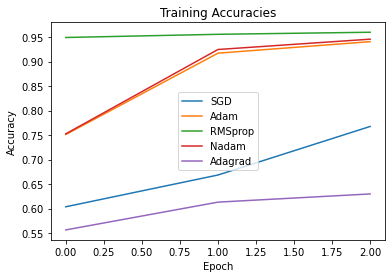

In [10]:
plt.plot(history_sgd.history['accuracy'])
plt.plot(history_adam.history['accuracy'])
plt.plot(history_rms.history['accuracy'])
plt.plot(history_nadam.history['accuracy'])
plt.plot(history_adagrad.history['accuracy'])

plt.title('Training Accuracies')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['SGD', 'Adam', 'RMSprop', 'Nadam', 'Adagrad'])

### Comparing Testing Accuracies

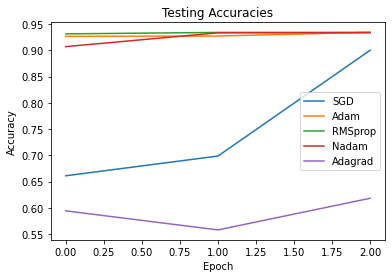

In [11]:
plt.plot(history_sgd.history['val_accuracy'])
plt.plot(history_adam.history['val_accuracy'])
plt.plot(history_rms.history['val_accuracy'])
plt.plot(history_nadam.history['val_accuracy'])
plt.plot(history_adagrad.history['val_accuracy'])

plt.title('Testing Accuracies')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['SGD', 'Adam', 'RMSprop', 'Nadam', 'Adagrad'])

### Plotting individual graphs

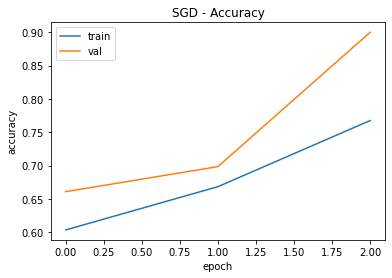

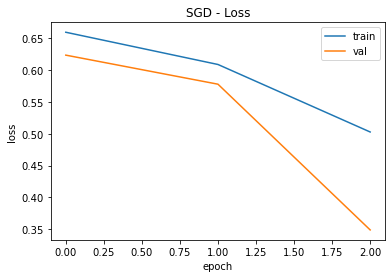

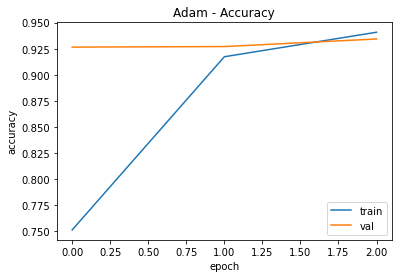

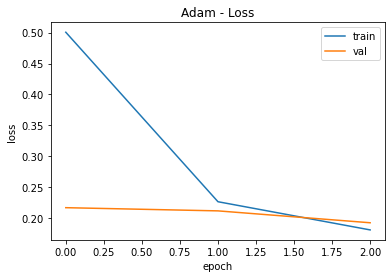

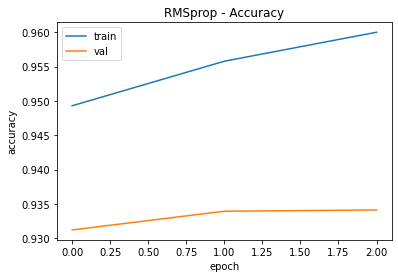

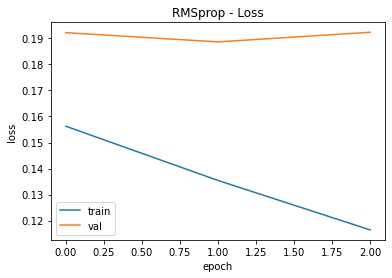

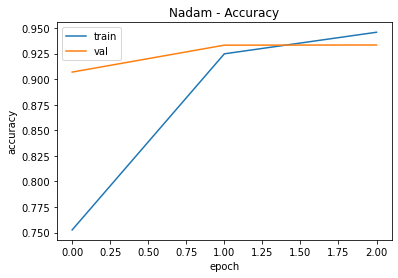

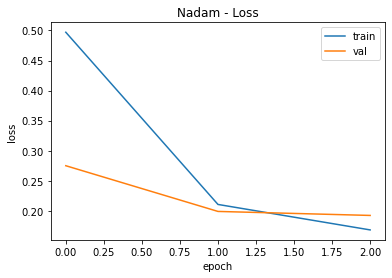

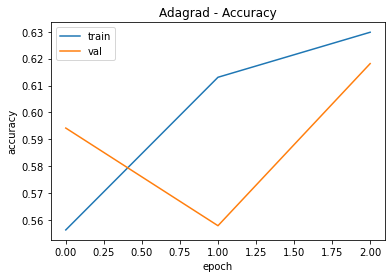

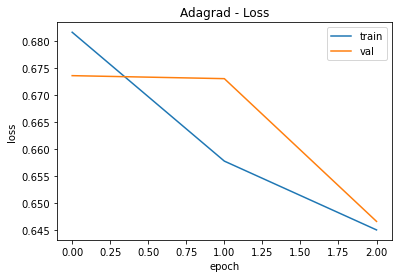

In [12]:
# SGD
plt.plot(history_sgd.history['accuracy'])
plt.plot(history_sgd.history['val_accuracy'])
plt.title('SGD - Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

print()
print()

plt.plot(history_sgd.history['loss'])
plt.plot(history_sgd.history['val_loss'])
plt.title('SGD - Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

print()
print()

# Adam
plt.plot(history_adam.history['accuracy'])
plt.plot(history_adam.history['val_accuracy'])
plt.title('Adam - Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

print()
print()

plt.plot(history_adam.history['loss'])
plt.plot(history_adam.history['val_loss'])
plt.title('Adam - Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

print()
print()

# RMSprop
plt.plot(history_rms.history['accuracy'])
plt.plot(history_rms.history['val_accuracy'])
plt.title('RMSprop - Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

print()
print()

plt.plot(history_rms.history['loss'])
plt.plot(history_rms.history['val_loss'])
plt.title('RMSprop - Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

print()
print()

# Nadam
plt.plot(history_nadam.history['accuracy'])
plt.plot(history_nadam.history['val_accuracy'])
plt.title('Nadam - Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

print()
print()

plt.plot(history_nadam.history['loss'])
plt.plot(history_nadam.history['val_loss'])
plt.title('Nadam - Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

# Adagrad
plt.plot(history_adagrad.history['accuracy'])
plt.plot(history_adagrad.history['val_accuracy'])
plt.title('Adagrad - Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

print()
print()

plt.plot(history_adagrad.history['loss'])
plt.plot(history_adagrad.history['val_loss'])
plt.title('Adagrad - Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

In [13]:
model_sgd.evaluate(train_generator)
model_adam.evaluate(train_generator)
model_rms.evaluate(train_generator)
model_nadam.evaluate(train_generator)
model_adagrad.evaluate(train_generator)

  ...
    to  
  ['...']
689/689 [==============================] - 20s 29ms/step - loss: 0.3490 - accuracy: 0.8881
  ...
    to  
  ['...']
689/689 [==============================] - 19s 28ms/step - loss: 0.0803 - accuracy: 0.9673
  ...
    to  
  ['...']
689/689 [==============================] - 19s 27ms/step - loss: 0.6978 - accuracy: 0.49800s - loss: 0.6978 - accuracy: 0.
  ...
    to  
  ['...']
689/689 [==============================] - 20s 28ms/step - loss: 0.1139 - accuracy: 0.9633
  ...
    to  
  ['...']
689/689 [==============================] - 20s 29ms/step - loss: 0.6299 - accuracy: 0.6479


[0.6299443568909981, 0.64794993]

In [14]:
score1 = model_sgd.evaluate(validation_generator)
score2 = model_adam.evaluate(validation_generator)
score3 = model_rms.evaluate(validation_generator)
score4 = model_nadam.evaluate(validation_generator)
score5 = model_adagrad.evaluate(validation_generator)

  ...
    to  
  ['...']
173/173 [==============================] - 5s 29ms/step - loss: 0.3489 - accuracy: 0.9000
  ...
    to  
  ['...']
173/173 [==============================] - 5s 29ms/step - loss: 0.1924 - accuracy: 0.9341
  ...
    to  
  ['...']
173/173 [==============================] - 5s 28ms/step - loss: 0.6970 - accuracy: 0.5031
  ...
    to  
  ['...']
173/173 [==============================] - 5s 29ms/step - loss: 0.1923 - accuracy: 0.9334
  ...
    to  
  ['...']
173/173 [==============================] - 5s 30ms/step - loss: 0.6466 - accuracy: 0.6181


In [15]:
print(' model_sgd Test accuracy:', round(score1[1] * 100, 2))
print(' model_adam Test accuracy:', round(score2[1] * 100, 2))
print(' model_rms Test accuracy:', round(score3[1] * 100, 2))
print(' model_nadam Test accuracy:', round(score4[1] * 100, 2))
print(' model_adagrad Test accuracy:', round(score5[1] * 100, 2))

 model_sgd Test accuracy: 90.0
 model_adam Test accuracy: 93.41
 model_rms Test accuracy: 50.31
 model_nadam Test accuracy: 93.34
 model_adagrad Test accuracy: 61.81


Text(0.5, 0, 'Optimizers')

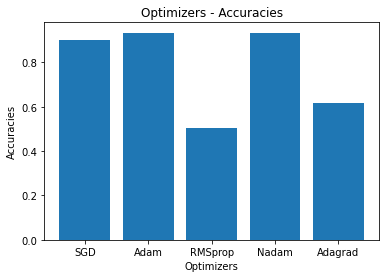

In [16]:
algo = ['SGD','Adam','RMSprop','Nadam', 'Adagrad']
accuracy = [score1[1], score2[1], score3[1], score4[1], score5[1]]
plt.bar(algo,accuracy)
plt.title('Optimizers - Accuracies')
plt.ylabel('Accuracies')
plt.xlabel('Optimizers')

### Classification Reports

In [17]:
predict_model_sgd = model_sgd.predict(validation_generator)
predict_model_sgd = np.argmax(predict_model_sgd, axis=1)
print("Malaria model_sgd Classification report")
print(classification_report(validation_generator.classes, predict_model_sgd))
print()

predict_model_adam = model_adam.predict(validation_generator)
predict_model_adam = np.argmax(predict_model_adam, axis=1)
print("Malaria model_adam Classification report")
print(classification_report(validation_generator.classes, predict_model_adam))
print()

predict_model_rms = model_rms.predict(validation_generator)
predict_model_rms = np.argmax(predict_model_rms, axis=1)
print("Malaria model_rms Classification report")
print(classification_report(validation_generator.classes, predict_model_rms))
print()

predict_model_nadam = model_nadam.predict(validation_generator)
predict_model_nadam = np.argmax(predict_model_nadam, axis=1)
print("Malaria model_nadam Classification report")
print(classification_report(validation_generator.classes, predict_model_nadam))
print()

predict_model_adagrad = model_adagrad.predict(validation_generator)
predict_model_adagrad = np.argmax(predict_model_adagrad, axis=1)
print("Malaria model_adagrad Classification report")
print(classification_report(validation_generator.classes, predict_model_adagrad))

Malaria model_sgd Classification report
              precision    recall  f1-score   support

           0       0.49      0.49      0.49      2755
           1       0.49      0.48      0.48      2755

    accuracy                           0.49      5510
   macro avg       0.49      0.49      0.49      5510
weighted avg       0.49      0.49      0.49      5510


Malaria model_adam Classification report
              precision    recall  f1-score   support

           0       0.49      0.51      0.50      2755
           1       0.49      0.47      0.48      2755

    accuracy                           0.49      5510
   macro avg       0.49      0.49      0.49      5510
weighted avg       0.49      0.49      0.49      5510


Malaria model_rms Classification report
              precision    recall  f1-score   support

           0       0.50      0.98      0.66      2755
           1       0.49      0.02      0.04      2755

    accuracy                           0.50      5510
   ma

In [18]:
model_adagrad.save('malaria_model_adagrad1.h5')
model_nadam.save('malaria_model_nadam1.h5')
model_rms.save('malaria_model_rms1.h5')
model_adam.save('malaria_model_adam1.h5')
model_sgd.save('malaria_model_sgd1.h5')

### Results/Visualization Graphs
* **Training Accuracies**  
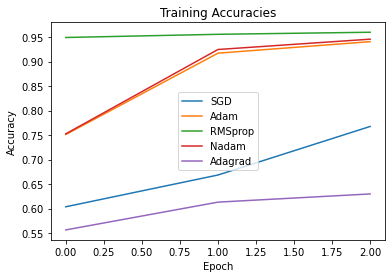  

* **Testing Accuracies**  
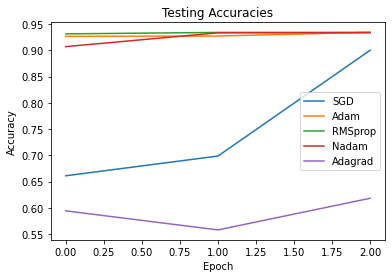  

* **Bar Graph of Testing Accuracies**  
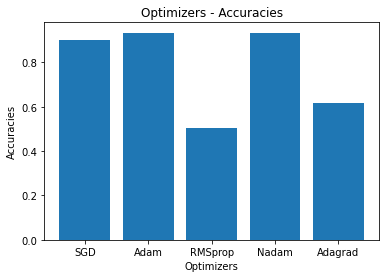  


### Analysis of results
We trained the models with multiple optimizers. Stochastic gradient descent achieves highest training accuracy of 96.73 % and Adam gave testing accuracy of 93.41 %. With this experiment we come to know why adam is most commonly used.

### Conclusion
In this experiment, we studied different optimizers and developed models with them. Adam got the best testing accuracy. we learned the working and implementation of various other optimizers.